# Generate Synthetic data

In [157]:
import pandas as pd
import numpy as np
import random

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
data = {
    'Name': ['Name' + str(i) for i in range(1, 5001)],
    'Age': np.random.randint(18, 60, 5000),
    'Gender': random.choices(['Male', 'Female'], k=5000),
    'Test 1': np.random.randint(60, 100, 5000),
    'Test 2': np.random.randint(60, 100, 5000),
    'Test 3': np.random.randint(60, 100, 5000),
    'Height': np.random.randint(150, 200, 5000),
    'Weight': np.random.randint(50, 100, 5000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Insert some missing values
for col in 'Test 1', 'Test 2', 'Test 3', 'Height', 'Weight':
    df.loc[df.sample(frac=0.1).index, col] = np.nan

# Save the DataFrame to a CSV file
df.to_csv('synthetic_data.csv', index=False)

print(df.head())


    Name  Age  Gender  Test 1  Test 2  Test 3  Height  Weight
0  Name1   56    Male     NaN    98.0    81.0     NaN    54.0
1  Name2   46    Male     NaN    91.0    98.0   185.0    51.0
2  Name3   32  Female    95.0    77.0    82.0   154.0    95.0
3  Name4   25  Female    94.0    76.0    89.0   188.0    73.0
4  Name5   38  Female    91.0    93.0     NaN   155.0    67.0


# Questions (1 marks each)

# Questions

Part - A

Question 1:
Load the synthetic data CSV file into a pandas DataFrame and display the first 10 rows of the DataFrame.

Question 2:
Check for any missing values in the DataFrame.

Question 3:
Fill the missing values in each column with the mean of that column.

Question 4:
Create a new column in the DataFrame called 'Average' which is the average of 'Test 1', 'Test 2', and 'Test 3' for each student.

Question 5:
Find the total number of Male and Female students.

Question 6:
Find the average age of Male and Female students.

Question 7:
Find the students with the top 10 highest average marks.

Question 8:
Create a histogram to visualize the distribution of the 'Average' marks.

Question 9:
Create a bar plot to visualize the number of Male and Female students.

Question 10:
Create a box plot to visualize the distribution of the 'Age' of the students.

Question 11:
Create a multivariate line plot to visualize the average scores of 'Test 1', 'Test 2', and 'Test 3' for males and females.

Question 12:
Save the updated DataFrame with the 'Average' column to a new CSV file.


Part - B

Question 13:
Convert the following lists into a single pandas DataFrame.

names = ['Alice', 'Bob', 'Charlie', 'David']
ages = [25, 30, 35, 40]


Question 14:
Create a list of squares of all even numbers between 1 and 20 using list comprehension.

Question 15:
Use a lambda function to create a list of odd numbers between 1 and 50.

Question 16:
Write a Python program to print a right angle triangle using "*"

In [158]:
#1)Reading the data

data=pd.read_csv('synthetic_data.csv')

In [159]:
#To display the first 10 data
data.head(10)

,Name,Age,Gender,Test 1,Test 2,Test 3,Height,Weight
0,Name1,56,Male,NaN,98.0,81.0,NaN,54.0
1,Name2,46,Male,NaN,91.0,98.0,185.0,51.0
2,Name3,32,Female,95.0,77.0,82.0,154.0,95.0
3,Name4,25,Female,94.0,76.0,89.0,188.0,73.0
4,Name5,38,Female,91.0,93.0,NaN,155.0,67.0
5,Name6,56,Female,99.0,98.0,77.0,194.0,76.0
6,Name7,36,Female,83.0,66.0,69.0,185.0,73.0
7,Name8,40,Male,76.0,94.0,98.0,194.0,78.0
8,Name9,28,Male,NaN,89.0,89.0,153.0,60.0
9,Name10,28,Female,NaN,71.0,85.0,159.0,97.0


In [160]:
#2)To find the missing values
data.isnull().sum()

Name        0
Age         0
Gender      0
Test 1    500
Test 2    500
Test 3    500
Height    500
Weight    500
dtype: int64

In [161]:
#3)To fill the null values with mean
data['Test 1']=data['Test 1'].fillna(data['Test 1'].mean())

In [162]:
data['Test 2']=data['Test 2'].fillna(data['Test 2'].mean())

In [163]:
data['Test 3']=data['Test 3'].fillna(data['Test 3'].mean())

In [164]:
data['Height']=data['Height'].fillna(data['Height'].mean())

In [165]:
data['Weight']=data['Weight'].fillna(data['Weight'].mean())

In [166]:
data.isnull().sum()

Name      0
Age       0
Gender    0
Test 1    0
Test 2    0
Test 3    0
Height    0
Weight    0
dtype: int64

In [167]:
#4)Creating a new column
data['Average']=df[['Test 1','Test 2','Test 3']].mean(axis=1)

In [168]:
#Checking the null values in Average column
data['Average'].isnull().sum()

7

In [169]:
data['Average']=data['Average'].fillna(data['Average'].mean())

In [170]:
data['Average'].isnull().sum()

0

In [171]:
#Data after creating new column
data.sample(5)

,Name,Age,Gender,Test 1,Test 2,Test 3,Height,Weight,Average
1479,Name1480,45,Female,67.0,93.000000,81.0,191.0,75.0,80.333333
4419,Name4420,24,Male,76.0,67.000000,69.0,185.0,69.0,70.666667
392,Name393,54,Female,81.0,69.000000,78.0,172.0,72.0,76.000000
4954,Name4955,39,Male,65.0,78.000000,76.0,172.0,64.0,73.000000
3838,Name3839,51,Female,99.0,79.543111,96.0,184.0,53.0,97.500000


In [172]:
#5)Find the total number of Male and Female students.
data.groupby('Gender')['Gender'].count()

Gender
Female    2579
Male      2421
Name: Gender, dtype: int64

In [173]:
#6)Find the average age of Male and Female students.

data.groupby('Gender')['Age'].mean()

Gender
Female    38.622334
Male      38.704667
Name: Age, dtype: float64

In [174]:
#7)Find the students with the top 10 highest average marks
Top_10=data.groupby('Name')['Average'].mean().sort_values(ascending=False)

In [175]:
Top_10.head(10)

Name
Name4596    99.0
Name3175    98.5
Name2946    98.0
Name2563    98.0
Name3244    98.0
Name4763    98.0
Name3839    97.5
Name2858    97.5
Name3298    97.5
Name1153    97.5
Name: Average, dtype: float64

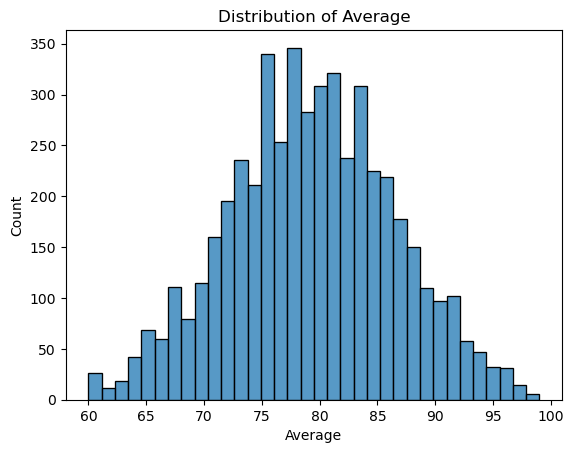

In [176]:
#8)Create a histogram to visualize the distribution of the 'Average' marks.
import seaborn as sns
sns.histplot(data, x="Average")
plt.title('Distribution of Average')
plt.show()

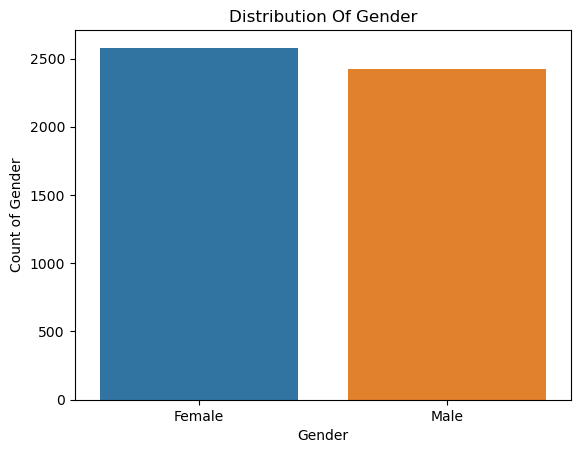

In [177]:
#9)Create a bar plot to visualize the number of Male and Female students.
a=data['Gender'].value_counts()
sns.barplot(data,x=a.index,y=a.values)
plt.ylabel('Count of Gender')
plt.title("Distribution Of Gender")
plt.show()

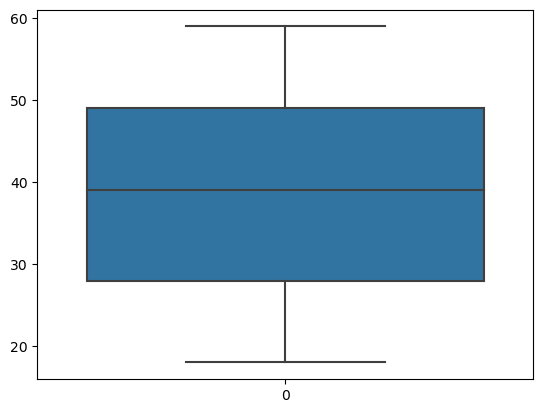

In [178]:
#10)Create a box plot to visualize the distribution of the 'Age' of the students.
ax = sns.boxplot(data["Age"]) 
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


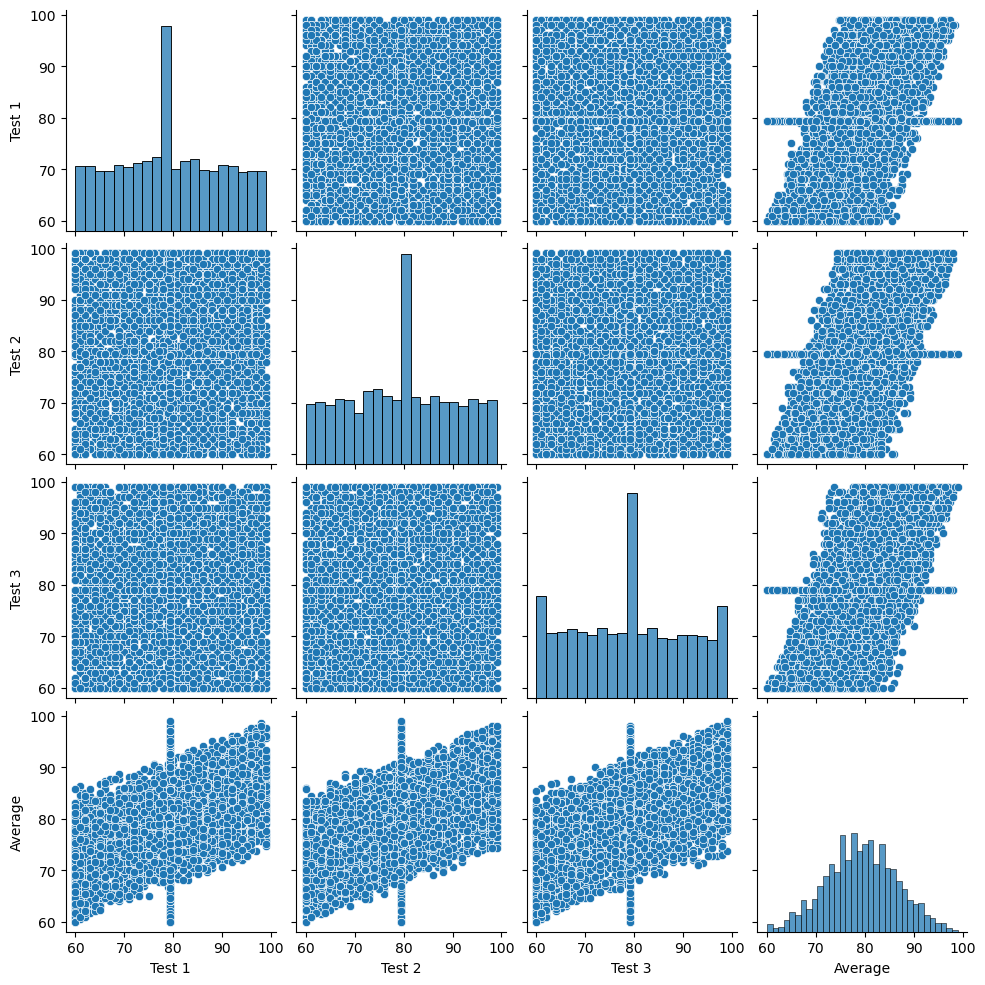

In [179]:
#11)Create a multivariate line plot to visualize the average scores of 'Test 1', 'Test 2', and 'Test 3' for males and females.

sns.pairplot(data, vars=['Test 1','Test 2','Test 3','Average'])
plt.show()

In [180]:
# Save the DataFrame to a CSV file
data.to_csv('syn_data.csv', index=False)

In [181]:
#Convert the following lists into a single pandas DataFrame.

names = ['Alice', 'Bob', 'Charlie', 'David']
ages = [25, 30, 35, 40]
pd.DataFrame([names,ages]).T


,0,1
0,Alice,25
1,Bob,30
2,Charlie,35
3,David,40


In [182]:
#Create a list of squares of all even numbers between 1 and 20 using list comprehension.

l1=[x**2 for x in range(2,20) if x%2==0]
print(l1)

[4, 16, 36, 64, 100, 144, 196, 256, 324]


In [183]:
#Use a lambda function to create a list of odd numbers between 1 and 50.
l1=list(filter(lambda x:x%2!=0 ,range(1,50)))
print(l1)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [184]:
#Write a Python program to print the following star pattern:

for i in range(1,6):
    print("*"*i)

*
**
***
****
*****
